In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [2]:
hotel_df = pd.read_csv(r"C:\Users\ruben\Desktop\DataPortfolio\Datasets\Hotel\hotel_bookings.csv")

In [4]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [33]:
hotel_df.shape

(119390, 32)

In [7]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# irrelevant lines: if a reservation has the columns adults, children and babies simultaneously = 0

# .all(axis=1) --> checks if all values across rows are True for the subset filter
# ~ --> bitwise NOT operator, which inverts the boolean value

In [3]:
subset = ['adults', 'children', 'babies']
hotel_df = hotel_df[~(hotel_df[subset] == 0).all(axis=1)]

In [4]:
hotel_df.shape

(119210, 32)

In [41]:
# removing duplicated rows

In [5]:
hotel_df = hotel_df.drop_duplicates()

In [6]:
hotel_df.shape

(87230, 32)

In [47]:
# BUSINESS rules: 
# lead_time = the number of days between when a booking is made and the actual arrival 
# adr = average daily rate

In [7]:
subset2 = ['lead_time', 'total_of_special_requests', 'adr']

In [49]:
# getting a descriptive analysis of the subset

In [50]:
hotel_df[subset2].describe()

,lead_time,total_of_special_requests,adr
count,87230.000000,87230.000000,87230.000000
mean,79.971019,0.698934,106.518031
std,86.058683,0.832051,54.891227
min,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,72.250000
50%,49.000000,0.000000,98.200000
75%,125.000000,1.000000,134.100000
max,737.000000,5.000000,5400.000000


In [51]:
# for clarity, we transpose the output

In [52]:
hotel_df[subset2].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [55]:
# to get more specific percentile values to identify outliers
# we will use a nested for loop, the 1st for all the features and
# the 2nd for all the percentiles

In [8]:
# loop that iterates the list of columns
for col in ['lead_time', 'total_of_special_requests', 'adr']:
    # prints the name of the current column being processed
    print('feature name: {}'.format(col))
    # loop that iterates the percentile range from 90 to 99 (inclusive)
    for i in range (90,100,1):
        # calculates the quantile value for the processed col and i 
        quantile_value = np.quantile(hotel_df[col], q = i/100)
        # prints the quantile value for the processed col and i
        print('{}th quantile value is {}'.format(i, quantile_value))
    # prints a new line after all quantiles for a col are printed
    print('\n')

feature name: lead_time
90th quantile value is 204.0
91th quantile value is 212.0
92th quantile value is 220.0
93th quantile value is 230.0
94th quantile value is 241.0
95th quantile value is 256.0
96th quantile value is 272.0
97th quantile value is 291.0
98th quantile value is 315.0
99th quantile value is 347.0


feature name: total_of_special_requests
90th quantile value is 2.0
91th quantile value is 2.0
92th quantile value is 2.0
93th quantile value is 2.0
94th quantile value is 2.0
95th quantile value is 2.0
96th quantile value is 2.0
97th quantile value is 3.0
98th quantile value is 3.0
99th quantile value is 3.0


feature name: adr
90th quantile value is 174.0
91th quantile value is 179.0
92th quantile value is 185.0
93th quantile value is 190.0
94th quantile value is 197.1
95th quantile value is 204.13300000000018
96th quantile value is 213.0
97th quantile value is 225.0
98th quantile value is 239.0
99th quantile value is 261.6207000000011




In [61]:
# QUESTION: where do the guests come from?

In [62]:
# remove the rows where the booking is cancelled

In [9]:
not_cancelled_df = hotel_df[hotel_df['is_canceled'] == 0]

In [65]:
not_cancelled_df.shape

(63221, 32)

In [66]:
# counting the values by country

In [10]:
not_cancelled_df['country'].value_counts()

country
PRT    17573
GBR     8440
FRA     7091
ESP     5382
DEU     4332
       ...  
ZMB        1
SYC        1
MDG        1
SMR        1
FRO        1
Name: count, Length: 165, dtype: int64

In [68]:
# converting this series into a df for index preservation and data consistency

In [11]:
not_cancelled_df['country'].value_counts().reset_index()

,country,count
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [13]:
country_df = not_cancelled_df['country'].value_counts().reset_index()

In [71]:
# making columns more readability

In [14]:
country_df.columns = ['country', 'No of guests']

In [75]:
# building a map to analyse the ratio of guests per country

In [15]:
map_guest = px.choropleth(data_frame=country_df,
              locations='country',
              color='No of guests',
              hover_name='country',
              title = 'Home Country of Guests'
             )

map_guest.show()

In [ ]:
# ANSWER: Portugal is the country with the highest number of guests = 17,573k

In [88]:
# QUESTION: how often do people get their reserved room type?

In [94]:
# we will use a crosstab table to intersect the values between booked and assigned

# margins=True --> outputs the totals (margins) for each row and column
# rows = reserved ; columns = assigned

In [17]:
pd.crosstab(index=hotel_df['reserved_room_type'], columns=hotel_df['assigned_room_type'], margins=True)

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [92]:
# to get the % of chance, we have to normalize the parameters

In [93]:
pd.crosstab(index=hotel_df['reserved_room_type'], columns=hotel_df['assigned_room_type'], margins=True, normalize='index').round(2)*100 

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [96]:
#ANSWERS: 
# 81% of guests that reserved type A got type A
# 1% of guests that reserved type G got type F

In [18]:
# QUESTION: which market segment has the highest bookings?

In [19]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
# we create arrays to later input into the values, names parameters of the px.pie

In [27]:
not_cancelled_df['market_segment'].value_counts()
market_seg_values = not_cancelled_df['market_segment'].value_counts().values
market_seg_names = not_cancelled_df['market_segment'].value_counts().index

In [29]:
market_seg_values

array([33311, 11798, 10043,  3691,  3590,   607,   181], dtype=int64)

In [30]:
market_seg_names

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Corporate', 'Groups',
       'Complementary', 'Aviation'],
      dtype='object', name='market_segment')

In [21]:
# building a pie chart to visualize %s by market segment

In [37]:
plt.figure(figsize=(20,10))
px.pie(data_frame = None,
      names=market_seg_names,
      values=market_seg_values,
      title='Bookings by Market Segment')

<Figure size 2000x1000 with 0 Axes>

In [35]:
# QUESTION: Avg Daily Rate (ADR) by room type for all the market segments

<Axes: xlabel='market_segment', ylabel='adr'>

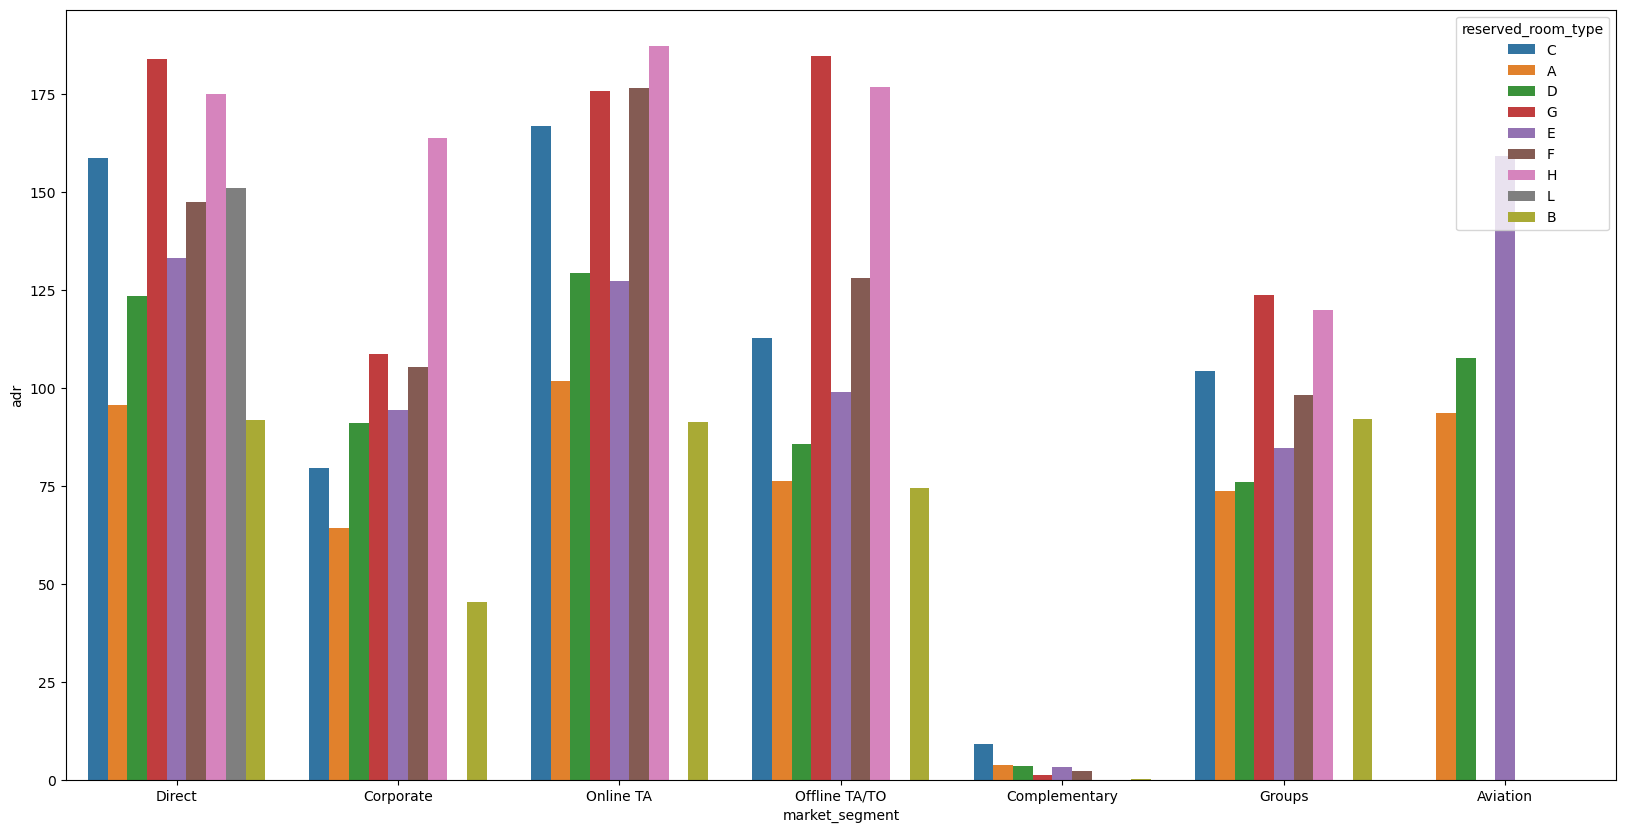

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=not_cancelled_df, 
            x='market_segment',
            y='adr',
            hue='reserved_room_type',
            # to remove the confidence intervale line
            errorbar=None)

In [41]:
#QUESTION: Total guests arrival per day

In [42]:
#transforming the months names into values (eg: Jan = 1, Feb = 2, etc)

In [44]:
dict_month = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

In [46]:
not_cancelled_df['arrival_date_month_index'] = not_cancelled_df['arrival_date_month'].map(dict_month)

C:\Users\ruben\AppData\Local\Temp\ipykernel_18948\2650402882.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# concatenating year, month, day to get eg: 2017-7-01

In [48]:
not_cancelled_df['arrival_date'] = not_cancelled_df['arrival_date_year'].astype(str) + '-' + not_cancelled_df['arrival_date_month_index'].astype(str) + '-' + not_cancelled_df['arrival_date_day_of_month'].astype(str)

C:\Users\ruben\AppData\Local\Temp\ipykernel_18948\3908324938.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
not_cancelled_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1


In [51]:
# aggregating adults, children and babies into one single column total_guests

In [52]:
not_cancelled_df['total_guest'] = not_cancelled_df['adults'] + not_cancelled_df['children'] + not_cancelled_df['babies']

C:\Users\ruben\AppData\Local\Temp\ipykernel_18948\2609917929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
not_cancelled_df[['arrival_date', 'total_guest']]

,arrival_date,total_guest
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [55]:
# sum the total_guest per day

In [57]:
not_cancelled_df.groupby(['arrival_date'])['total_guest'].sum()

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: total_guest, Length: 793, dtype: float64

In [58]:
# converting the series to df

In [66]:
sum_guests_per_day = pd.Series(not_cancelled_df.groupby(['arrival_date'])['total_guest'].sum())
sum_guests_per_day

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: total_guest, Length: 793, dtype: float64

In [60]:
# converting the index to datetime type

In [67]:
sum_guests_per_day.index = pd.to_datetime(sum_guests_per_day.index)
sum_guests_per_day

arrival_date
2015-10-01    149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-08-05    205.0
2017-08-06    199.0
2017-08-07    287.0
2017-08-08    191.0
2017-08-09    185.0
Name: total_guest, Length: 793, dtype: float64

In [62]:
# reset index to use it as column in the df

In [68]:
sum_guests_per_day = sum_guests_per_day.reset_index()
sum_guests_per_day.columns = ['arrival_date', 'guests']
sum_guests_per_day

,arrival_date,guests
0,2015-10-01,149.0
1,2015-10-10,167.0
2,2015-10-11,123.0
3,2015-10-12,186.0
4,2015-10-13,115.0
...,...,...
788,2017-08-05,205.0
789,2017-08-06,199.0
790,2017-08-07,287.0
791,2017-08-08,191.0


In [69]:
# sort the df by arrival_date

In [70]:
sum_guests_per_day = sum_guests_per_day.sort_values(by='arrival_date')

In [71]:
fig = px.line(sum_guests_per_day, x='arrival_date', y='guests', title='Total Guests Arrival Per Day')
fig.show()

In [72]:
#ANSWER: there is not a clear trend/seasonality

In [73]:
#QUESTION: analyse the distribution of guest arrival

In [74]:
type(sum_guests_per_day)

pandas.core.frame.DataFrame

In [76]:
# building an array with the guest's values

In [77]:
guests = sum_guests_per_day['guests'].values
guests

array([ 79.,  71.,  67.,  87.,  80.,  87.,  65.,  56.,  58.,  99.,  83.,
        86.,  79.,  48.,  53.,  80., 110.,  93.,  70., 109.,  62.,  59.,
        80.,  92., 143.,  63., 131.,  61.,  70.,  81., 106., 111.,  90.,
       143.,  74., 116.,  88., 125., 160., 149., 237., 171., 114., 113.,
       131., 168., 127., 176., 137., 116., 114., 132., 156., 130., 134.,
       115., 109.,  88., 122., 148., 100., 124., 167., 115., 164., 175.,
       175., 144., 173., 123., 143., 118., 148., 135., 102., 157., 124.,
       168., 174., 122., 180., 132., 172., 110., 142., 118., 167., 112.,
        83., 102.,  84., 138., 149., 151.,  94., 157., 167., 148., 152.,
       121., 158., 167., 123., 186., 115., 110., 197., 118.,  80., 172.,
       190., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
       111., 165.,  89.,  92.,  93.,  68.,  79., 113., 119.,  66.,  70.,
        68.,  69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  9

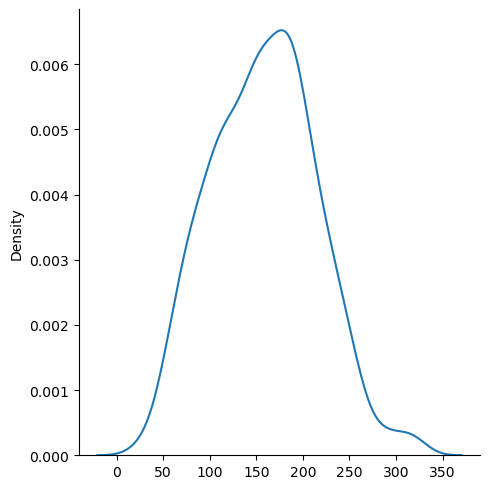

In [82]:
sns.displot(guests, kind='kde')

In [83]:
#ANSWER: the most likely amount of guests for any given day is somewhere between 175-200